## Imports

In [2]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# TODO get interactive plotting working in jupyterlab
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy

from interval import interval, inf, imath

from safe_train import *

ModuleNotFoundError: No module named 'tensorflow'

## CIFAR example

In [3]:
# cifar = tf.keras.datasets.cifar100
# (x_train, y_train), (x_test, y_test) = cifar.load_data()
# model = tf.keras.applications.ResNet50(
#     include_top=True,
#     weights=None,
#     input_shape=(32, 32, 3),
#     classes=100,)

In [101]:
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
# model.fit(x_train, y_train, epochs=5, batch_size=64)

In [102]:
# model.name

## OLS example

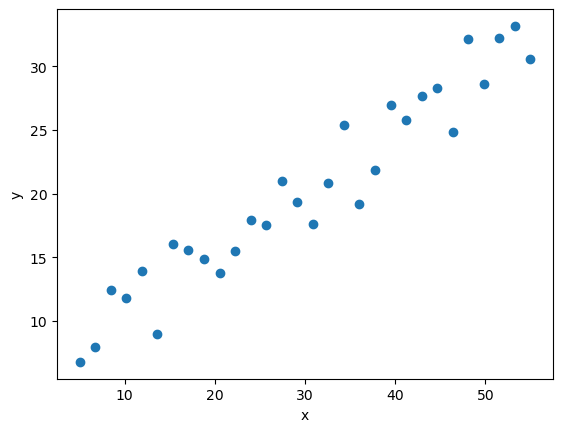

In [433]:
x, y = generate_data()
plt.figure()
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [360]:
# # TODO add more datapoints

# # x = np.array([5, 15, 25, 35, 45, 55])
# NOISE_STD = 2
# M = 0.5
# B = 5
# x = np.linspace(5, 55, 30)
# y_func = lambda x: M * x + B 
# y_noisy = lambda x: y_func(x) + np.random.normal(0, NOISE_STD, np.shape(x))
# # y = np.array([5, 20, 14, 32, 22, 38])
# y = y_noisy(x)

# plt.figure()
# plt.scatter(x,y)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.show()

In [434]:
normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
normalizer.adapt(x)

2023-04-06 23:25:53.879045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-06 23:25:53.892119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [435]:
normalizer.mean.numpy()

array([30.000002], dtype=float32)

In [436]:
normalizer.variance.numpy()

array([222.70117], dtype=float32)

In [364]:
regression_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1),
    layers.Dense(units=10),
    layers.Dense(units=1),
])

In [365]:
regression_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 36
Trainable params: 33
Non-trainable params: 3
_________________________________________________________________


In [366]:
regression_model.predict(x)

1/1 [==============================] - 0s 168ms/step


2023-04-06 14:27:52.683600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[-1.1011231 ],
       [-1.0251833 ],
       [-0.949244  ],
       [-0.8733043 ],
       [-0.797365  ],
       [-0.7214254 ],
       [-0.6454859 ],
       [-0.5695464 ],
       [-0.4936068 ],
       [-0.41766745],
       [-0.34172788],
       [-0.26578838],
       [-0.18984884],
       [-0.11390933],
       [-0.03796981],
       [ 0.03796963],
       [ 0.11390925],
       [ 0.18984869],
       [ 0.2657881 ],
       [ 0.34172767],
       [ 0.41766715],
       [ 0.49360675],
       [ 0.5695462 ],
       [ 0.6454858 ],
       [ 0.7214253 ],
       [ 0.79736465],
       [ 0.8733043 ],
       [ 0.9492437 ],
       [ 1.0251833 ],
       [ 1.1011229 ]], dtype=float32)

### Training

In [367]:
regression_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error'
)

In [368]:
%%time
history = regression_model.fit(
    x,
    y,
    epochs=1000,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

2023-04-06 14:27:56.115288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-06 14:27:56.435509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


CPU times: user 15.6 s, sys: 5.26 s, total: 20.9 s
Wall time: 19.7 s


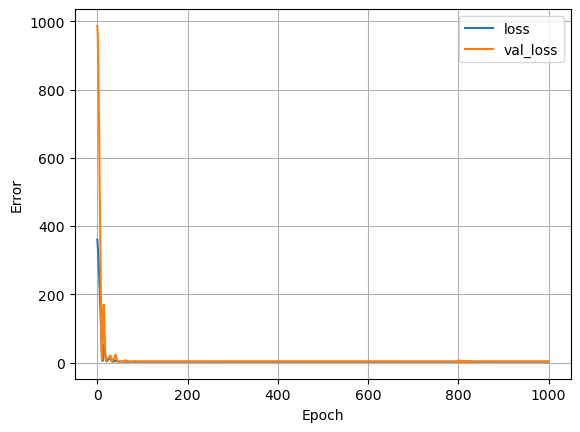

In [369]:
def plot_loss(history):
    plt.figure()
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(history)

In [370]:
ys = regression_model.predict(x)
ys

1/1 [==============================] - 0s 55ms/step


2023-04-06 14:28:35.511757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[ 6.353011 ],
       [ 7.3323555],
       [ 8.311697 ],
       [ 9.29104  ],
       [10.270383 ],
       [11.249725 ],
       [12.229069 ],
       [13.208411 ],
       [14.187755 ],
       [15.167096 ],
       [16.146439 ],
       [17.125782 ],
       [18.105127 ],
       [19.084469 ],
       [20.063812 ],
       [21.043156 ],
       [22.0225   ],
       [23.00184  ],
       [23.981186 ],
       [24.960526 ],
       [25.939869 ],
       [26.919214 ],
       [27.898558 ],
       [28.877901 ],
       [29.857243 ],
       [30.836582 ],
       [31.815928 ],
       [32.79527  ],
       [33.774612 ],
       [34.753956 ]], dtype=float32)

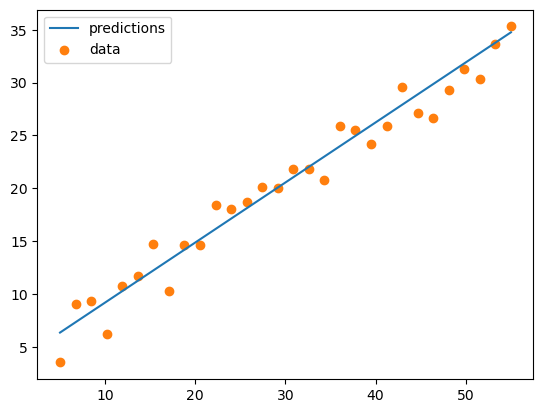

In [371]:
plt.figure()
plt.plot(x, ys)
plt.scatter(x, y, color="C1")
plt.legend(["predictions", "data"])
plt.show()

In [372]:
popt, pcov = scipy.optimize.curve_fit(lambda x, b0, b1: b0 + b1*x, x, y)
popt

array([3.86520803, 0.54816637])

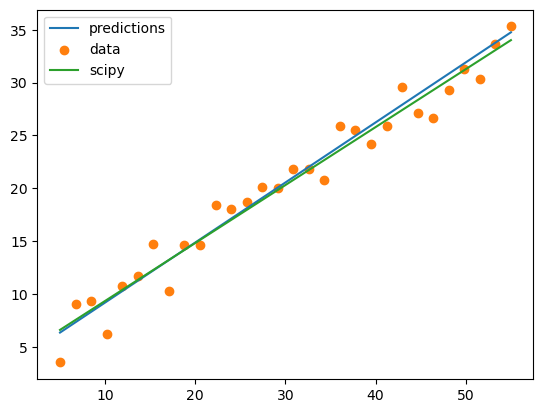

In [373]:
y_scipy = x * popt[1] + popt[0]
plt.figure()
plt.plot(x, ys)
plt.scatter(x, y, color="C1")
plt.plot(x, y_scipy, color="C2")
plt.legend(["predictions", "data", "scipy"])
plt.show()

## With functions:

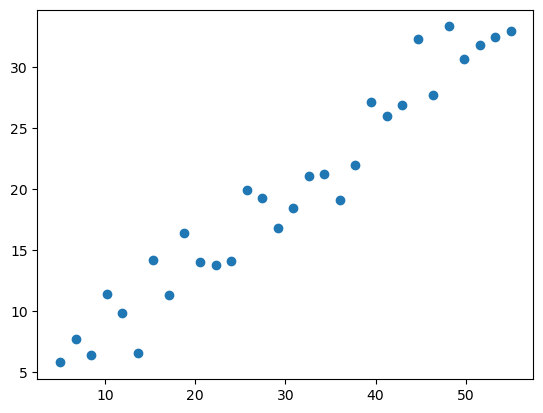

In [111]:
x, y = generate_data()
plt.figure()
plt.scatter(x, y)
plt.show()

2023-04-03 08:46:17.982160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-03 08:46:17.995003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-03 08:46:18.179908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-03 08:46:18.397751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


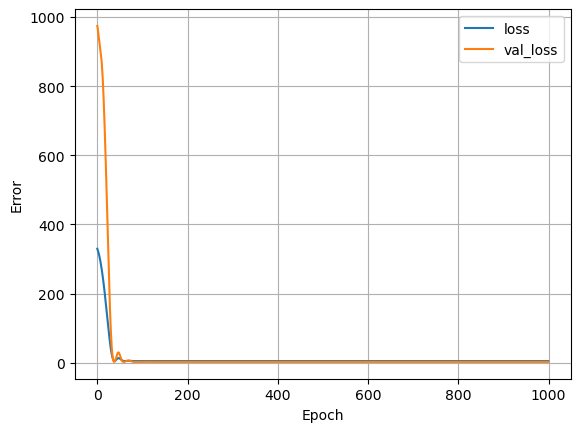

In [144]:
model, history = train_single_node_nn(x, y)
plot_loss(history)

1/1 [==============================] - 0s 42ms/step


2023-04-03 08:46:42.066870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


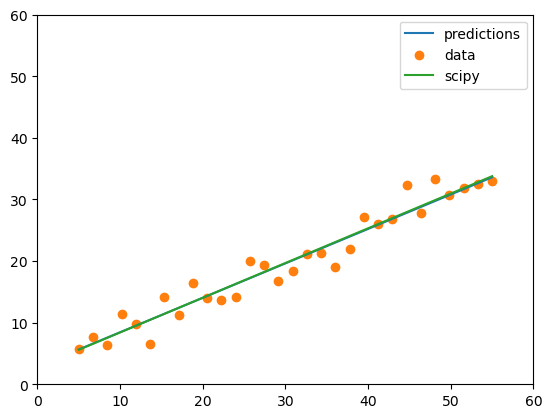

In [145]:
plot_predictions(model, x, y, [0, 60], [0, 60])

In [146]:
# neural network values
y_predict = model.predict(x)
# scipy values
popt, _ = scipy.optimize.curve_fit(lambda x, b0, b1: b0 + b1 * x, x, y)
y_scipy = x * popt[1] + popt[0]

1/1 [==============================] - 0s 12ms/step


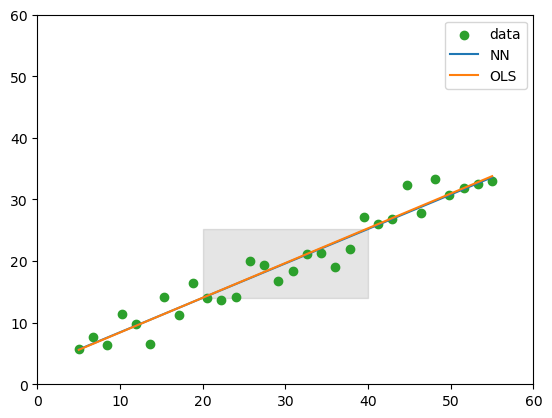

In [147]:
input_interval = interval[20, 40]
output_interval = propagate_interval(input_interval, model)
plot_intervals(input_interval, output_interval, x, y, y_predict, y_scipy)

## Viewing weights

In [199]:
for layer in regression_model.layers: print(layer.get_config()); print(layer.get_weights())

{'name': 'normalization_5', 'trainable': True, 'batch_input_shape': (None, 1), 'dtype': 'float32', 'axis': (), 'mean': None, 'variance': None}
[30.000002, 222.70117, 30]
{'name': 'dense_8', 'trainable': True, 'dtype': 'float32', 'units': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
[array([[1.3976517]], dtype=float32), array([1.6543617], dtype=float32)]
{'name': 'dense_9', 'trainable': True, 'dtype': 'float32', 'units': 2, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bia

## Interval arithmetic

In [261]:
input_interval = interval[10, 40]
input_interval

interval([10.0, 40.0])

In [279]:
norm_interval = (input_interval - norm_mean) / norm_std
norm_interval

interval([-1.3401974324779955, 0.6700985245222355])

In [288]:
weight, bias = model.layers[1].get_weights()
output_interval = weight[0, 0] * norm_interval + bias[0]
output_interval

array([[1.2399263 , 5.45611963]])

In [266]:
weight2, bias2 = model.layers[2].get_weights()
output_interval *= weight2
output_interval += bias2

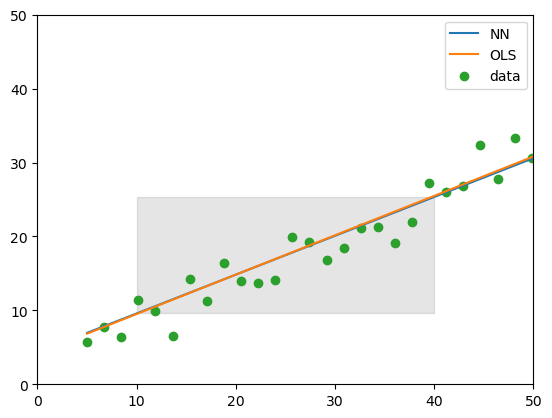

In [130]:
fig = plt.figure()
ax = fig.gca()

input_width = input_interval[0].sup - input_interval[0].inf
output_width = output_interval[0][1] - output_interval[0][0]
interval_rect = matplotlib.patches.Rectangle((input_interval[0].inf, output_interval[0][0]), input_width, output_width)
ax.add_collection(matplotlib.collections.PatchCollection([interval_rect], facecolor='k', alpha=0.1, edgecolor='k'))
ax.set_xlim([0, 50])
ax.set_ylim([0, 50])

plt.plot(x, ys)
plt.plot(x, y_scipy, color="C1")
plt.scatter(x, y, color="C2")
plt.legend(["NN", "OLS", "data"])
plt.show()

In [97]:
# import tensorflow as tf
# from tensorflow.keras.optimizers.legacy import Adam

# cifar = tf.keras.datasets.cifar100
# (x_train, y_train), (x_test, y_test) = cifar.load_data()
# model = tf.keras.applications.ResNet50(
#     include_top=True,
#     weights=None,
#     input_shape=(32, 32, 3),
#     classes=100,)

# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# # Instantiate legacy Adam optimizer
# model.compile(optimizer=Adam(), loss=loss_fn, metrics=["accuracy"])
# model.fit(x_train, y_train, epochs=5, batch_size=64)


Epoch 1/5


2023-04-02 19:15:13.930749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 69s 83ms/step - loss: 4.8316 - accuracy: 0.0631
Epoch 2/5
782/782 [==============================] - 62s 79ms/step - loss: 4.2200 - accuracy: 0.1010
Epoch 3/5
782/782 [==============================] - 62s 79ms/step - loss: 3.9156 - accuracy: 0.1314
Epoch 4/5
782/782 [==============================] - 62s 79ms/step - loss: 3.5639 - accuracy: 0.1886
Epoch 5/5
782/782 [==============================] - 63s 80ms/step - loss: 3.6209 - accuracy: 0.1895


## Multi-node

In [374]:
input_interval = interval[10, 40]
input_interval

interval([10.0, 40.0])

In [375]:
# testing with utility
propagate_interval(input_interval, regression_model)

[interval([6.005117461103091, 29.421660062525902])]

In [376]:
norm_mean, norm_var, norm_n = regression_model.layers[0].get_weights()
norm_std = np.sqrt(norm_var)

In [377]:
norm_interval = (input_interval - norm_mean) / norm_std
norm_interval

interval([-1.3401974324779955, 0.6700985245222355])

In [378]:
weight1, bias1 = regression_model.layers[1].get_weights()
weight1

array([[2.6016767]], dtype=float32)

In [379]:
weight1.shape

(1, 1)

In [380]:
bias1

array([-0.24839507], dtype=float32)

In [381]:
interval1 = weight1[0,0] * norm_interval + bias1[0]
interval1

array([[-3.73515551,  1.49498465]])

In [382]:
interval1 = float(weight1) * norm_interval + float(bias1)
interval1

interval([-3.7351555072611164, 1.4949846491950993])

In [383]:
weight2, bias2 = regression_model.layers[2].get_weights()
weight2

array([[ 0.16121994,  0.8129365 , -0.01987398,  0.02010121,  0.38604748,
         0.53929716, -0.33083647, -0.14903614,  0.35253435, -0.5190458 ]],
      dtype=float32)

In [384]:
bias2

array([ 1.3726412,  1.3830839, -1.4682345, -1.4515332,  1.1157389,
        1.4429001,  1.496465 , -1.3949412,  1.380997 , -1.4535339],
      dtype=float32)

In [385]:
# unpack weight2 to propagate to two different intervals
weight2.shape

(1, 10)

In [389]:
interval2_0 = interval1 * weight2[0, 0] + bias2[0]
interval2_0

interval([0.7704596605496317, 1.613662540618123])

In [390]:
interval2_1 = interval1 * weight2[0, 1] + bias2[1]
interval2_1

interval([-1.6533602487530406, 2.5984115051193992])

In [391]:
weight3, bias3 = regression_model.layers[3].get_weights()
weight3

array([[ 1.2797909],
       [ 1.2696681],
       [-1.59171  ],
       [-1.525649 ],
       [ 0.9253794],
       [ 1.4764364],
       [ 1.7497294],
       [-1.3376071],
       [ 1.2899771],
       [-1.5219781]], dtype=float32)

In [392]:
bias3

array([1.6576817], dtype=float32)

In [393]:
# combine two intervals with weight3
weight3.shape

(10, 1)

In [394]:
weight3[0, 0]

1.2797909

In [395]:
weight3[1, 0]

1.2696681

In [396]:
interval3 = 0
interval3 += interval2_0 * weight3[0, 0] + interval2_1 * weight3[1, 0] + bias3
interval3

interval([0.5444901798402015, 7.021952508305306])

## Curved paths

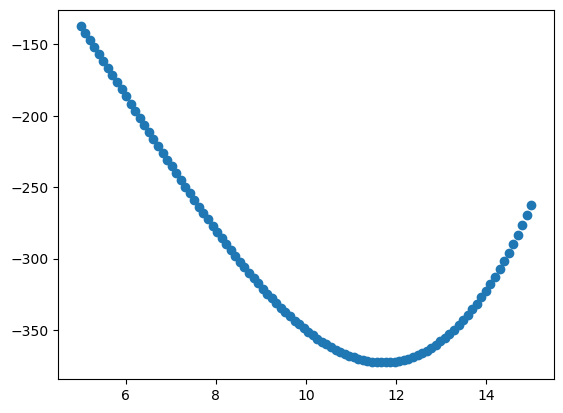

In [443]:
x = np.linspace(5, 15, 100)
y = 0.5 * x ** 3 - 9 * x ** 2 + 5*x
plt.scatter(x, y)

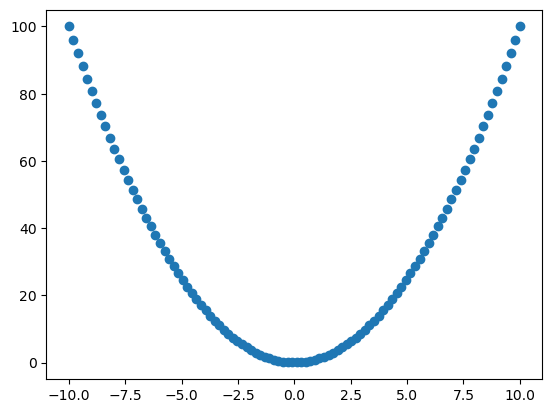

In [450]:
x = np.linspace(-10, 10, 100)
y = x**2
plt.scatter(x, y)

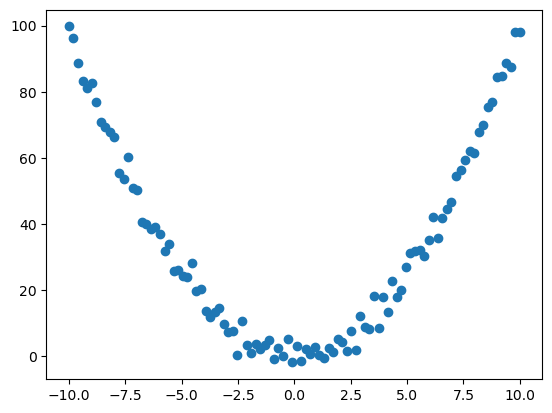

In [454]:
y_noisy = y + np.random.randn(*x.shape) * 3
plt.scatter(x, y_noisy)

In [455]:
normalizer = layers.Normalization(
    input_shape=[
        1,
    ],
    axis=None,
)
normalizer.adapt(x)
normalizer.get_config()

2023-04-06 23:27:32.426830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-06 23:27:32.439464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


{'name': 'normalization_18',
 'trainable': True,
 'batch_input_shape': (None, 1),
 'dtype': 'float32',
 'axis': (),
 'mean': None,
 'variance': None}

In [456]:
normalizer.mean

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.682209e-07], dtype=float32)>

In [457]:
normalizer.variance

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([34.006733], dtype=float32)>

In [1]:
normalizer = layers.Normalization(
    input_shape=[
        1,
    ],
    axis=None,
)
normalizer.adapt(x)
regression_model = tf.keras.Sequential(
    [
        normalizer, 
        layers.Dense(units=1, activation="sigmoid"),
        layers.Dense(units=10, activation="sigmoid"),
        layers.Dense(units=10, activation="sigmoid"),
        layers.Dense(units=10, activation="sigmoid"),
        layers.Dense(units=1, activation="sigmoid"),
    ]
)
regression_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss="mean_squared_error"
)
history = regression_model.fit(
    x,
    y,
    epochs=500,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split=0.1,
)

NameError: name 'layers' is not defined

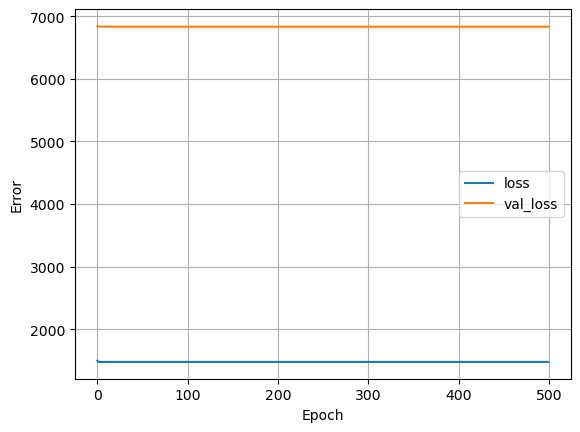

In [473]:
plot_loss(history)

4/4 [==============================] - 0s 14ms/step


2023-04-06 23:35:10.621063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


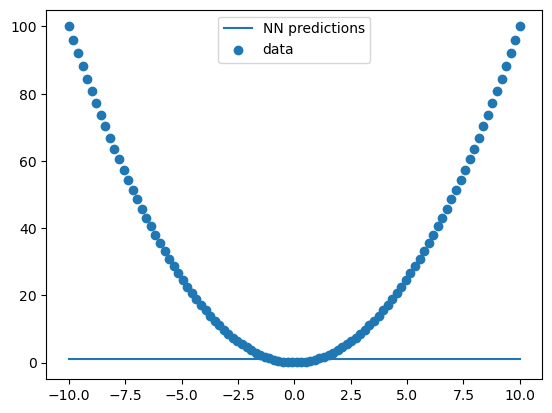

In [474]:
y_predict = regression_model.predict(x)
plt.plot(x, y_predict)
plt.scatter(x, y)
plt.legend(["NN predictions", "data"])

In [475]:
y_predict

array([[0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
       [0.9999938],
